In [23]:
#!pip install --user fundamentus

In [24]:
#!pip install urllib3==1.25.8 --user

In [1]:
# HELLO WORLD FROM HOME

In [11]:
!pip install --user openpyxl==3.0.0

  Stored in directory: C:\Users\a.bandeira.de.mello\AppData\Local\pip\Cache\wheels\34\ee\6c\1279f7b70ea72432c2cef15dd3d915477cb3771d1618f6b8ef
Successfully built openpyxl


In [1]:
import fundamentus
import pandas as pd
import matplotlib.pyplot as plt
import os
from datetime import date, datetime
from openpyxl import load_workbook

cwd = os.getcwd()

C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)
2023-03-10 16:28:08,569 [logging.log_init] INFO: LOGLEVEL=INFO


In [2]:
tickers = pd.read_excel("Tickers BOVA 22.xlsx")

In [3]:
tick = tickers.Código
tick

0     RRRP3
1     ALPA4
2     ABEV3
3     AMER3
4     ASAI3
      ...  
85    VALE3
86    VIIA3
87    VBBR3
88    WEGE3
89    YDUQ3
Name: Código, Length: 90, dtype: object

In [4]:
df = fundamentus.get_resultado()

In [5]:
df.columns

Index(['cotacao', 'pl', 'pvp', 'psr', 'dy', 'pa', 'pcg', 'pebit', 'pacl',
       'evebit', 'evebitda', 'mrgebit', 'mrgliq', 'roic', 'roe', 'liqc',
       'liq2m', 'patrliq', 'divbpatr', 'c5y'],
      dtype='object', name='Multiples')

In [6]:
'''
# Filtrando somente os tickers ativos em 2022

df_22 = df.copy(deep=True)
df_22.reset_index(inplace =True)
df_22 = df_22[df_22["papel"].isin(tick)]
df_22
'''

'\n# Filtrando somente os tickers ativos em 2022\n\ndf_22 = df.copy(deep=True)\ndf_22.reset_index(inplace =True)\ndf_22 = df_22[df_22["papel"].isin(tick)]\ndf_22\n'

In [7]:
# Filtrando somente os tickers com cotação acima de 0

df_valido = df.copy(deep=True)
df_valido.reset_index(inplace =True)
df_valido = df_valido[df_valido["cotacao"] > 0]

# Adicionando campo de data atual e passando para o início

day = date.today()
time = datetime.now().strftime("%H:%M:%S")

df_valido["dia"] = day
df_valido["hora"] = time

# Passando colunas de dia e hora para o inicio
first_column = df_valido.pop('dia')
second_column = df_valido.pop('hora')

df_valido.insert(0, 'dia', first_column) # insert column using insert(position,column_name,first_column) function
df_valido.insert(1, 'hora', second_column)

df_valido.sort_values('dy', ascending = False, inplace=True)

df_valido

Multiples,dia,hora,papel,cotacao,pl,pvp,psr,dy,pa,pcg,...,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
308,2023-03-10,16:28:13,DESK3,8.71,16.39,0.83,1.194,5.0925,0.314,9.28,...,5.14,0.2494,0.0853,0.0770,0.0503,1.23,1979060.0,9.209070e+08,0.95,0.0000
416,2023-03-10,16:28:13,FIGE3,12.03,0.00,0.19,0.000,3.2855,0.000,0.00,...,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.0,1.486920e+08,0.00,-0.6779
823,2023-03-10,16:28:13,SYNE3,4.03,0.50,0.40,0.266,2.1621,0.146,1.00,...,0.78,0.6505,0.5652,0.3999,0.7934,6.61,1826880.0,1.550460e+09,0.67,0.3715
417,2023-03-10,16:28:13,FIGE4,38.01,0.00,0.60,0.000,1.1438,0.000,0.00,...,0.00,0.0000,0.0000,0.0000,0.0000,0.00,0.0,1.486920e+08,0.00,-0.6779
896,2023-03-10,16:28:13,TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,...,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.0,5.935800e+07,0.00,0.0577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,2023-03-10,16:28:13,FHER3,16.90,2.59,2.06,0.157,0.0000,0.297,1.08,...,2.53,0.0701,0.0608,0.1940,0.7953,1.57,3464930.0,4.420200e+08,0.50,0.1569
419,2023-03-10,16:28:13,FLCL3,11.50,134.20,71.08,13.094,0.0000,12.959,166.00,...,77.54,0.1737,0.0976,0.2291,0.5297,1.23,0.0,7.292000e+07,2.96,-0.2963
420,2023-03-10,16:28:13,FLCL5,12.50,145.87,77.26,14.232,0.0000,14.086,180.44,...,84.09,0.1737,0.0976,0.2291,0.5297,1.23,0.0,7.292000e+07,2.96,-0.2963
421,2023-03-10,16:28:13,FLCL6,9.91,115.65,61.25,11.283,0.0000,11.168,143.05,...,67.11,0.1737,0.0976,0.2291,0.5297,1.23,0.0,7.292000e+07,2.96,-0.2963


### FILTROS

In [8]:
# FILTRO1: P/L > zero & Margem EBIT > 40%

filtro1 = df_valido[ (df_valido.pl > 0) & (df_valido.mrgebit > 0.4)]

# FILTRO2: P/L > zero & Margem EBIT > 40% & Divided Yield > 0.1

filtro2 = df_valido[ (df_valido.pl > 0) & (df_valido.mrgebit > 0.4) & (df_valido.dy > 0.1)]

# FILTRO3: P/L > zero & ROE > 0.4

filtro3 = df_valido[ (df_valido.pl > 0) & (df_valido.roe > 0.4)]

In [9]:
filtro1.sort_values('dy', ascending = False, inplace = True)
filtro2.sort_values('dy', ascending = False, inplace = True)
filtro3.sort_values('roe', ascending = False, inplace = True)

C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Text(0.5, 1.0, 'Açoes com P/L maior que 0 e Margem Ebit maior que 0.4')

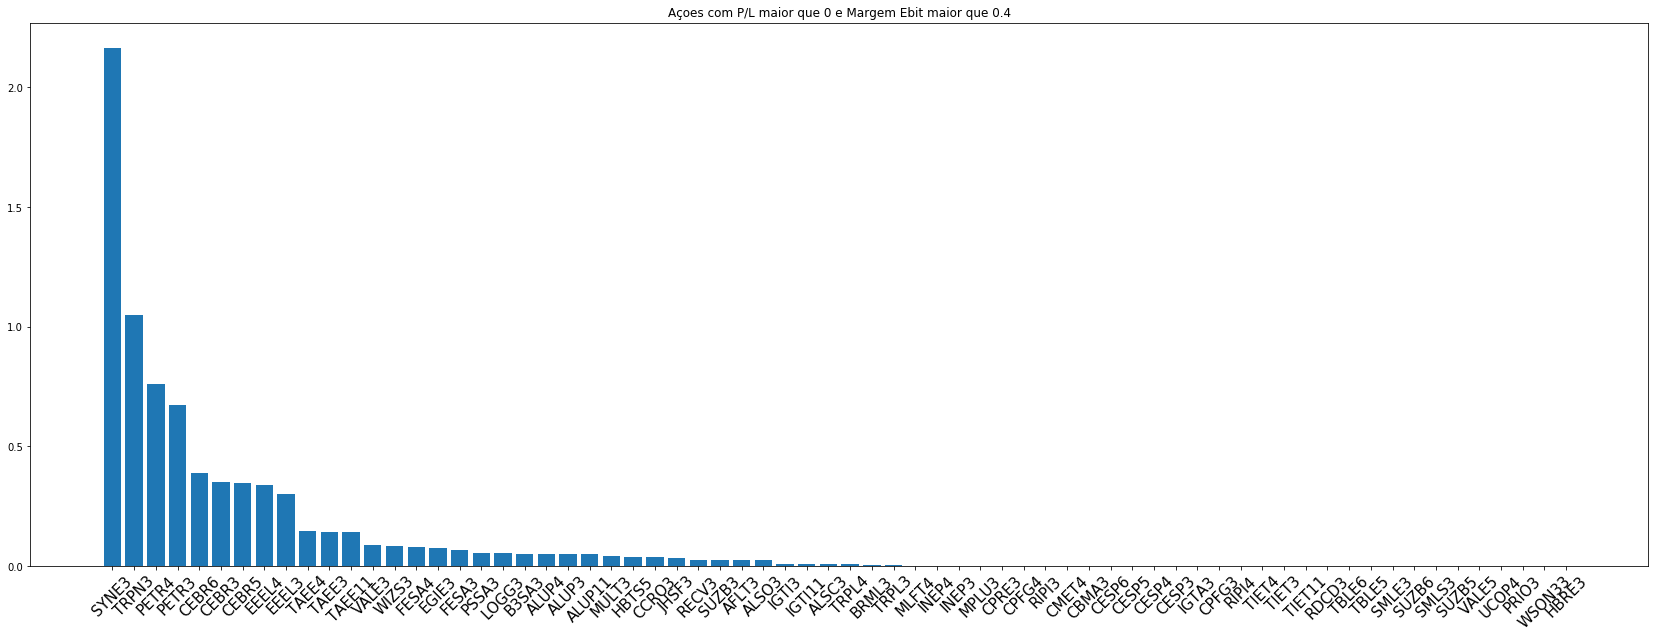

In [10]:
# PLOT FILTRO 1

plt.figure(figsize=(29,10));
plt.bar(filtro1.papel, filtro1.dy);
plt.xticks(rotation= 45, fontsize = 15);
plt.title("Açoes com P/L maior que 0 e Margem Ebit maior que 0.4")

In [11]:
filtro1[["papel","dy", "pl", "mrgebit", "roe"]]

Multiples,papel,dy,pl,mrgebit,roe
823,SYNE3,2.1621,0.50,0.6505,0.7934
896,TRPN3,1.0474,0.44,0.7228,1.2235
663,PETR4,0.7595,1.63,0.4623,0.4738
662,PETR3,0.6720,1.84,0.4623,0.4738
202,CEBR6,0.3896,3.69,0.4596,0.2030
...,...,...,...,...,...
924,VALE5,0.0000,1.49,0.4872,0.5945
911,UCOP4,0.0000,18.01,0.8392,0.0723
695,PRIO3,0.0000,9.34,0.6061,0.3660
966,WSON33,0.0000,8.07,0.4414,0.1217


Text(0.5, 1.0, 'Açoes com P/L maior que 0, Margem Ebit maior que 0.4 e Dividend Yield maior que 0.1')

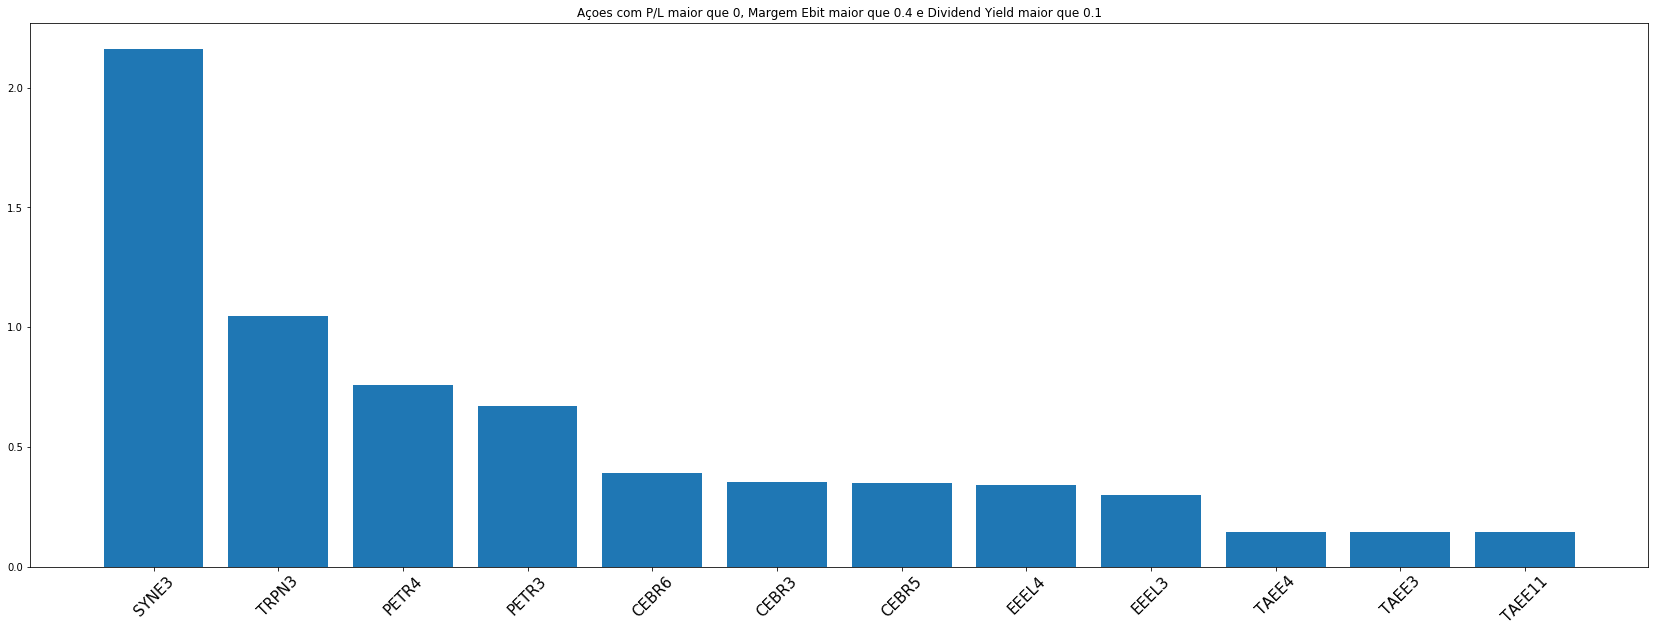

In [12]:
# PLOT FILTRO 2

plt.figure(figsize=(29,10));
plt.bar(filtro2.papel, filtro2.dy);
plt.xticks(rotation= 45, fontsize = 15);
plt.title("Açoes com P/L maior que 0, Margem Ebit maior que 0.4 e Dividend Yield maior que 0.1")

Text(0.5, 1.0, 'Açoes com P/L maior que 0 e ROE maior que 0.4')

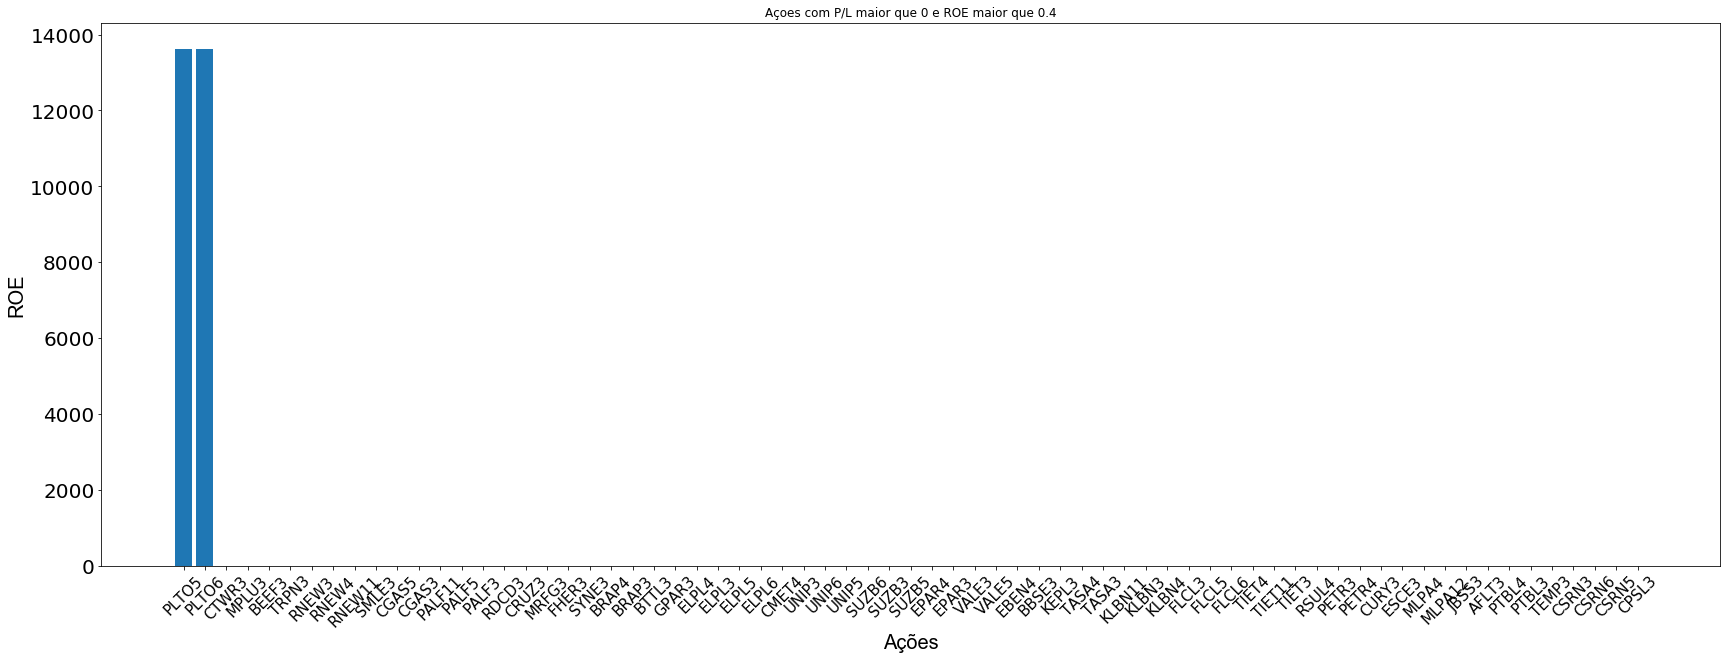

In [13]:
# PLOT FILTRO 3

plt.figure(figsize=(29,10));
plt.bar(filtro3.papel, filtro3.roe);
plt.xlabel("Ações", **{'fontname':'Arial', 'size':'20'});
plt.ylabel("ROE", **{'fontname':'Arial', 'size':'20'});
plt.xticks(rotation= 45, fontsize = 15);
plt.yticks(fontsize=20);
plt.title("Açoes com P/L maior que 0 e ROE maior que 0.4")

In [14]:
# FILTRO IDEAL: 
# 1. P/L > 0 
# 2. ROE > 15%
# 3. Margem EBIT > 40%
# 4. Divided Yield > 10%

filtro_ideal = df_valido[ (df_valido.pl > 0) & (df_valido.roe > 0.2) & (df_valido.mrgebit > 0.4) & (df_valido.dy > 0.1)]
filtro_ideal.sort_values('dy', ascending = False, inplace = True)

C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [15]:
filtro_ideal

Multiples,dia,hora,papel,cotacao,pl,pvp,psr,dy,pa,pcg,...,evebitda,mrgebit,mrgliq,roic,roe,liqc,liq2m,patrliq,divbpatr,c5y
823,2023-03-10,16:28:13,SYNE3,4.03,0.50,0.40,0.266,2.1621,0.146,1.00,...,0.78,0.6505,0.5652,0.3999,0.7934,6.61,1.826880e+06,1.550460e+09,0.67,0.3715
896,2023-03-10,16:28:13,TRPN3,0.71,0.44,0.54,0.263,1.0474,0.399,0.59,...,-0.35,0.7228,0.5929,5.2301,1.2235,3.61,0.000000e+00,5.935800e+07,0.00,0.0577
663,2023-03-10,16:28:13,PETR4,22.04,1.63,0.77,0.466,0.7595,0.303,12.22,...,1.51,0.4623,0.2873,0.3230,0.4738,1.17,3.211460e+09,3.724980e+11,0.79,0.1536
662,2023-03-10,16:28:13,PETR3,24.91,1.84,0.87,0.527,0.6720,0.343,13.82,...,1.62,0.4623,0.2873,0.3230,0.4738,1.17,7.977180e+08,3.724980e+11,0.79,0.1536
202,2023-03-10,16:28:13,CEBR6,10.00,3.69,0.75,1.823,0.3896,0.534,1.21,...,1.07,0.4596,0.6868,0.2221,0.2030,6.90,1.645950e+05,9.625560e+08,0.00,-0.4332
200,2023-03-10,16:28:13,CEBR3,10.02,3.70,0.75,1.827,0.3535,0.535,1.21,...,1.08,0.4596,0.6868,0.2221,0.2030,6.90,6.968290e+04,9.625560e+08,0.00,-0.4332
201,2023-03-10,16:28:13,CEBR5,10.20,3.76,0.76,1.860,0.3472,0.545,1.24,...,1.14,0.4596,0.6868,0.2221,0.2030,6.90,6.310960e+04,9.625560e+08,0.00,-0.4332
827,2023-03-10,16:28:13,TAEE4,11.15,6.23,1.66,4.080,0.1451,0.645,4.36,...,8.20,0.7869,0.6549,0.1372,0.2661,3.71,4.556510e+06,6.950930e+09,1.22,0.2298
826,2023-03-10,16:28:13,TAEE3,11.18,6.25,1.66,4.091,0.1447,0.647,4.37,...,8.21,0.7869,0.6549,0.1372,0.2661,3.71,2.552010e+06,6.950930e+09,1.22,0.2298
825,2023-03-10,16:28:13,TAEE11,33.57,6.25,1.66,4.095,0.1446,0.648,4.37,...,8.22,0.7869,0.6549,0.1372,0.2661,3.71,1.146850e+08,6.950930e+09,1.22,0.2298


Text(0.5, 1.0, 'Açoes com P/L maior que 0, ROE maior que 0.2, Margem Ebit maior que 0.4 e Dividend Yield maior que 0.1')

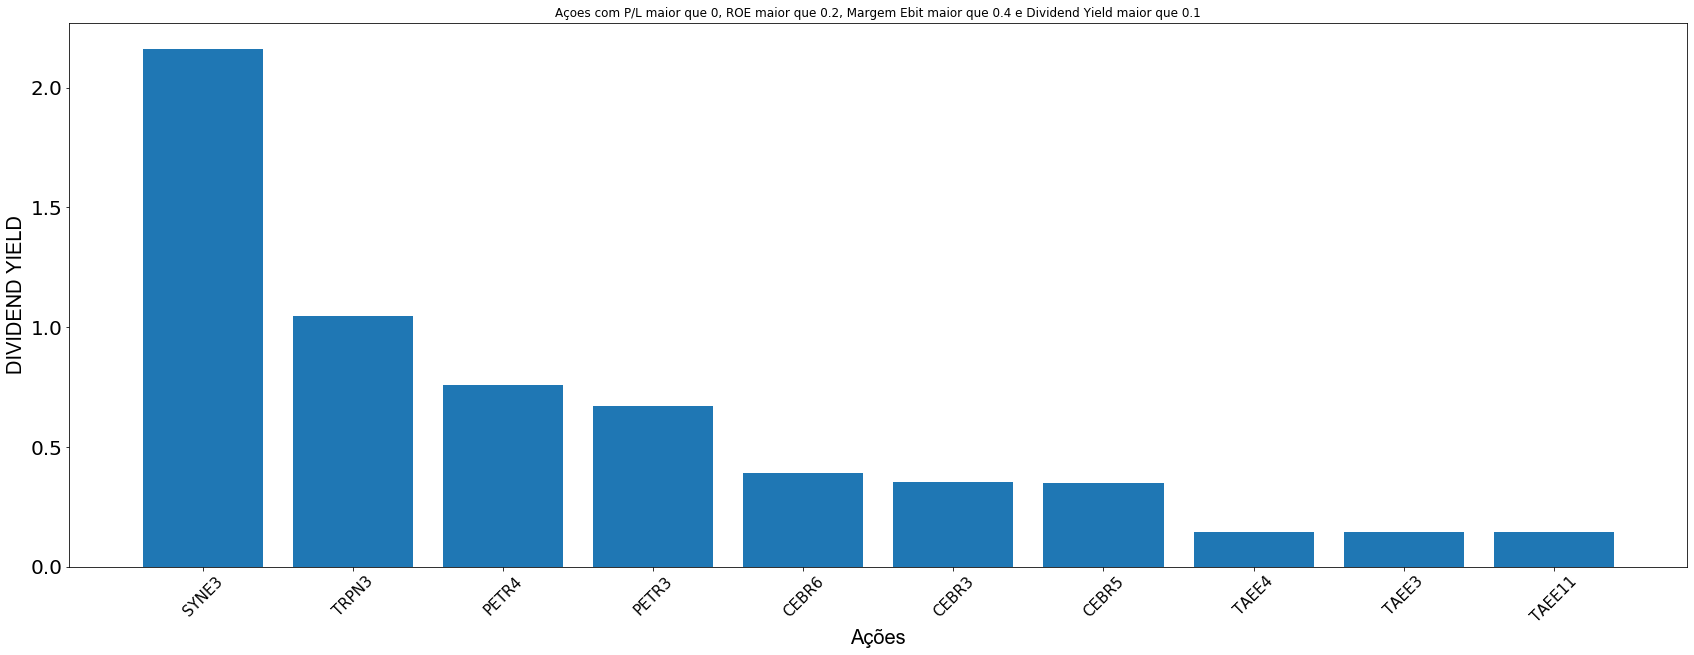

In [16]:
# PLOT FILTRO IDEAL

plt.figure(figsize=(29,10));
plt.bar(filtro_ideal.papel, filtro_ideal.dy);
plt.xlabel("Ações", **{'fontname':'Arial', 'size':'20'});
plt.ylabel("DIVIDEND YIELD", **{'fontname':'Arial', 'size':'20'});
plt.xticks(rotation= 45, fontsize = 15);
plt.yticks(fontsize=20);
plt.title("Açoes com P/L maior que 0, ROE maior que 0.2, Margem Ebit maior que 0.4 e Dividend Yield maior que 0.1")

In [17]:
df_valido.to_csv('Analise Fundamentalista açoes BR.csv', mode='a', index = False, decimal=',', sep=';', header=None)

In [18]:
'''
# SALVA EXCEL

path = 'Analise Fundamentalista açoes BR.xlsx'

writer = pd.ExcelWriter(path, engine='openpyxl')    
# copy existing sheets
writer.sheets = dict((ws.title, ws) for ws in writer.book.worksheets)
# read existing file
reader = pd.read_excel(r'Analise Fundamentalista açoes BR.xlsx')
# write out the new sheet
df_valido.to_excel(writer,index=False,header=False,startrow=len(reader)+1)

writer.close()
'''

"\n# SALVA EXCEL\n\npath = 'Analise Fundamentalista açoes BR.xlsx'\n\nwriter = pd.ExcelWriter(path, engine='openpyxl')    \n# copy existing sheets\nwriter.sheets = dict((ws.title, ws) for ws in writer.book.worksheets)\n# read existing file\nreader = pd.read_excel(r'Analise Fundamentalista açoes BR.xlsx')\n# write out the new sheet\ndf_valido.to_excel(writer,index=False,header=False,startrow=len(reader)+1)\n\nwriter.close()\n"

# Análise de Série Temporal de Ações Usando Python

In [2]:
# REFERENCIA 1.1: https://tradingcomdados.com/conteudo/artigos/8-blog/43-analise-de-serie-temporal-e-normalizacao-a-100-de-acoes-usando-python
# REFERENCIA 1.2: https://forum.casadodesenvolvedor.com.br/topic/45144-finan%C3%A7as-com-python-como-obter-dados-de-a%C3%A7%C3%B5es/
# REFERENCIA 2: https://www.youtube.com/watch?v=7GGrt3-rRH8

In [ ]:
#!pip install --user yfinance==0.1.62
!pip install --user yfinance --upgrade --no-cache-dir

In [18]:
from pandas_datareader import data as web
import yfinance as yf
yf.pdr_override()

In [ ]:
ibov = web.get_data_yahoo('^BVSP')

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py", line 376, in _make_request
    self._validate_conn(conn)
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py", line 994, in _validate_conn
    conn.connect()
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connection.py", line 360, in connect
    ssl_context=context,
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\util\ssl_.py", line 370, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Program Files (x86)\Anaconda3\lib\ssl.py", line 412, in wrap_socket
    session=session

In [5]:
ibov.head()

NameError: name 'ibov' is not defined

In [19]:
import yfinance as yf
import matplotlib.pyplot as plt

In [20]:
serie_vale = yf.download('VALE.SA', start='2023-01-29', end='2023-01-31', rounding=True) 

Exception in thread Thread-7:
Traceback (most recent call last):
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py", line 672, in urlopen
    chunked=chunked,
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py", line 376, in _make_request
    self._validate_conn(conn)
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py", line 994, in _validate_conn
    conn.connect()
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connection.py", line 360, in connect
    ssl_context=context,
  File "C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\util\ssl_.py", line 370, in ssl_wrap_socket
    return context.wrap_socket(sock, server_hostname=server_hostname)
  File "C:\Program Files (x86)\Anaconda3\lib\ssl.py", line 412, in wrap_socket
    session=session

KeyboardInterrupt: 

In [32]:
serie_vale.head()

NameError: name 'serie_vale' is not defined

In [ ]:
# REFERENCIA 2: https://pypi.org/project/b3api/

In [4]:
import b3api

In [8]:
data = b3api.assets.get('itsa4')

#data = b3api.assets.getAll(['ITSA4'])
print(data)

TypeError: get() got an unexpected keyword argument 'verify'

In [13]:
# REFERENCIA 3: https://sigmoidal.ai/como-analisar-acoes-da-bolsa-com-python/

In [11]:
# importar as bibliotecas necessárias
from pandas_datareader import data as web
import plotly.graph_objects as go

# criar um DataFrame vazio
df = pd.DataFrame()

# escolher a ação desejada
acao = 'ITUB3.SA'
# importar dados para o DataFrame
df = web.DataReader(acao, data_source='yahoo', start='01-01-2000')
# ver as 5 primeiras entradas
df.head()

In [1]:
# ALPHA VANTAGE
# https://www.youtube.com/watch?v=kB4jCoVyLRI

In [21]:
API_KEY = '35P04JH4ONHOFNYL'

In [22]:
from alpha_vantage.timeseries import TimeSeries

## Acessando a API

In [23]:
ts = TimeSeries(key=API_KEY, output_format='pandas')

In [24]:
ts.get_symbol_search('itau')

SSLError: HTTPSConnectionPool(host='www.alphavantage.co', port=443): Max retries exceeded with url: /query?function=SYMBOL_SEARCH&keywords=itau&apikey=35P04JH4ONHOFNYL&datatype=json (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self signed certificate in certificate chain (_ssl.c:1056)')))

In [28]:
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=itau&apikey=' + API_KEY
r = requests.get(url, verify=False)
data = r.json()

print(data)

C:\Users\a.bandeira.de.mello\AppData\Roaming\Python\Python37\site-packages\urllib3\connectionpool.py:1004: InsecureRequestWarning: Unverified HTTPS request is being made to host 'www.alphavantage.co'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


{'Information': 'Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints'}


In [29]:
data

{'Information': 'Thank you for using Alpha Vantage! This is a premium endpoint. You may subscribe to any of the premium plans at https://www.alphavantage.co/premium/ to instantly unlock all premium endpoints'}